In [1]:
%reset -fs

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
image_size = (128,128)

In [5]:
train_ds = image_dataset_from_directory('mstar_imgs',
                                           subset='training',
                                           image_size=image_size,
                                           labels='inferred',
                                           validation_split=.2,
                                           seed=10,
                                           label_mode='categorical',
                                           color_mode='grayscale',
                                           batch_size=32)

val_ds = image_dataset_from_directory('mstar_imgs',
                                           subset='validation',
                                           image_size=image_size,
                                           labels='inferred',
                                           validation_split=.2,
                                           seed=10,
                                           label_mode='categorical',
                                           color_mode='grayscale',
                                           batch_size=32)

Found 10595 files belonging to 9 classes.
Using 8476 files for training.
Found 10595 files belonging to 9 classes.
Using 2119 files for validation.


In [6]:
## 0: 2S1
## 1: BRDM-2
## 2: BTR-60
## 3: D7
## 4: SLICY
## 5: T62
## 6: T72
## 7: ZIL-131
## 8: ZSU-23-4

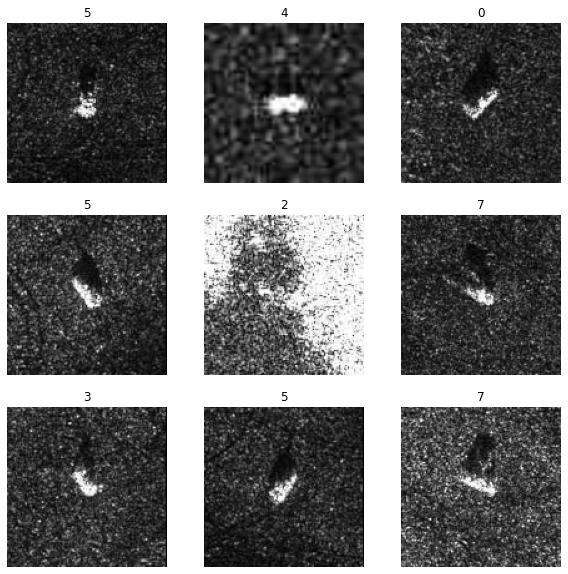

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')
        plt.title(np.argmax(labels[i]))
        plt.axis("off")

In [8]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

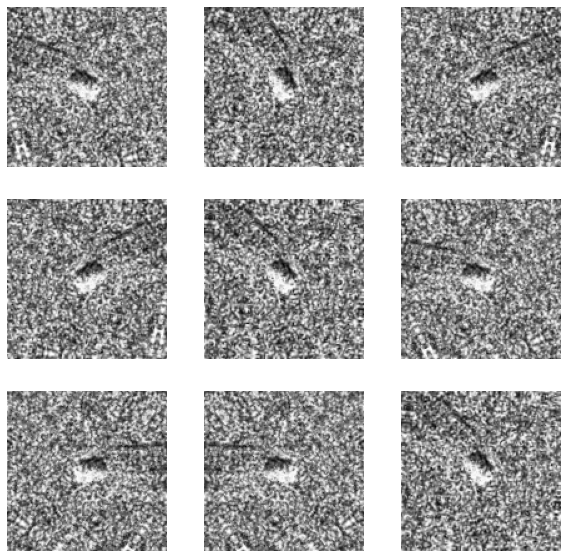

In [9]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"), cmap='gray')
        plt.axis("off")

In [10]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

In [11]:
metrics = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [12]:
model = keras.Sequential()

model.add(layers.InputLayer(input_shape=(128, 128, 1)))

model.add(layers.Flatten())

model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))

model.add(layers.Dense(9, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               1638500   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 909       
Total params: 1,659,609
Trainable params: 1,659,609
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=metrics)

In [14]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
265/265 [==============================] - 6s 15ms/step - loss: 46.0232 - tp: 4115.0000 - fp: 4311.0000 - tn: 63497.0000 - fn: 4361.0000 - accuracy: 0.8863 - precision: 0.4884 - recall: 0.4855 - auc: 0.7492 - prc: 0.3797 - val_loss: 2.0984 - val_tp: 1552.0000 - val_fp: 556.0000 - val_tn: 16396.0000 - val_fn: 567.0000 - val_accuracy: 0.9411 - val_precision: 0.7362 - val_recall: 0.7324 - val_auc: 0.9216 - val_prc: 0.7501
Epoch 2/10
265/265 [==============================] - 3s 12ms/step - loss: 1.7645 - tp: 6753.0000 - fp: 1678.0000 - tn: 66130.0000 - fn: 1723.0000 - accuracy: 0.9554 - precision: 0.8010 - recall: 0.7967 - auc: 0.9345 - prc: 0.8020 - val_loss: 2.4371 - val_tp: 1360.0000 - val_fp: 743.0000 - val_tn: 16209.0000 - val_fn: 759.0000 - val_accuracy: 0.9212 - val_precision: 0.6467 - val_recall: 0.6418 - val_auc: 0.8858 - val_prc: 0.6359
Epoch 3/10
265/265 [==============================] - 3s 13ms/step - loss: 2.0970 - tp: 6674.0000 - fp: 1761.0000 - tn: 66047.0000 - 

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer

CNN = Sequential()

CNN.add(layers.InputLayer(input_shape=(128, 128, 1)))


CNN.add(Conv2D(filters=10, kernel_size=3, activation='relu', padding='same'))

CNN.add(MaxPooling2D())


CNN.add(Conv2D(filters=20, kernel_size=3, activation='relu', padding='same'))

CNN.add(MaxPooling2D())


CNN.add(Conv2D(filters=30, kernel_size=3, activation='relu', padding='same'))

CNN.add(GlobalAveragePooling2D())


CNN.add(Dense(20, activation='relu'))
CNN.add(Dense(9, activation='sigmoid'))

CNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 10)      100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 20)        1820      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 30)        5430      
_________________________________________________________________
global_average_pooling2d (Gl (None, 30)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)               

In [16]:
CNN.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=metrics)

In [17]:
cnn_hist = CNN.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
265/265 [==============================] - 7s 16ms/step - loss: 0.4312 - tp: 949.0000 - fp: 1344.0000 - tn: 83416.0000 - fn: 9646.0000 - accuracy: 0.8847 - precision: 0.4139 - recall: 0.0896 - auc: 0.6489 - prc: 0.1919 - val_loss: 0.2717 - val_tp: 331.0000 - val_fp: 40.0000 - val_tn: 16912.0000 - val_fn: 1788.0000 - val_accuracy: 0.9041 - val_precision: 0.8922 - val_recall: 0.1562 - val_auc: 0.8081 - val_prc: 0.4518
Epoch 2/10
265/265 [==============================] - 4s 14ms/step - loss: 0.2221 - tp: 2862.0000 - fp: 627.0000 - tn: 67181.0000 - fn: 5614.0000 - accuracy: 0.9182 - precision: 0.8203 - recall: 0.3377 - auc: 0.8888 - prc: 0.6147 - val_loss: 0.1660 - val_tp: 935.0000 - val_fp: 55.0000 - val_tn: 16897.0000 - val_fn: 1184.0000 - val_accuracy: 0.9350 - val_precision: 0.9444 - val_recall: 0.4412 - val_auc: 0.9495 - val_prc: 0.7891
Epoch 3/10
265/265 [==============================] - 4s 14ms/step - loss: 0.1512 - tp: 4606.0000 - fp: 729.0000 - tn: 67079.0000 - fn: 38

In [18]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


xception = make_model(input_shape=image_size + (1,), num_classes=9)
xception.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 128, 128, 1)  0           input_3[0][0]                    
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 128, 128, 1)  0           sequential[0][0]                 
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 64, 64, 32)   320         rescaling[0][0]                  
______________________________________________________________________________________________

In [20]:
callbacks=[
        keras.callbacks.EarlyStopping(patience=10, verbose=1, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(factor=.5, patience=3, verbose=1),
    ]
xception.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=metrics,
)
xception_hist = xception.fit(
    train_ds, epochs=100, callbacks=callbacks, validation_data=val_ds,
)

Epoch 1/100
265/265 [==============================] - 28s 92ms/step - loss: 0.1400 - tp: 7410.0000 - fp: 1260.0000 - tn: 83500.0000 - fn: 3185.0000 - accuracy: 0.9534 - precision: 0.8547 - recall: 0.6994 - auc: 0.9718 - prc: 0.8700 - val_loss: 0.6501 - val_tp: 270.0000 - val_fp: 1849.0000 - val_tn: 15103.0000 - val_fn: 1849.0000 - val_accuracy: 0.8061 - val_precision: 0.1274 - val_recall: 0.1274 - val_auc: 0.5163 - val_prc: 0.1174
Epoch 2/100
265/265 [==============================] - 19s 73ms/step - loss: 0.0428 - tp: 7941.0000 - fp: 452.0000 - tn: 67356.0000 - fn: 535.0000 - accuracy: 0.9871 - precision: 0.9461 - recall: 0.9369 - auc: 0.9945 - prc: 0.9796 - val_loss: 1.1462 - val_tp: 277.0000 - val_fp: 1681.0000 - val_tn: 15271.0000 - val_fn: 1842.0000 - val_accuracy: 0.8153 - val_precision: 0.1415 - val_recall: 0.1307 - val_auc: 0.5259 - val_prc: 0.1306
Epoch 3/100
265/265 [==============================] - 19s 72ms/step - loss: 0.0257 - tp: 8175.0000 - fp: 273.0000 - tn: 67535.000